# This notebook focuses on Feature selection and Algorithm Implementation.

In [30]:
# Importing Libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as pyplot
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [2]:
training_data = pd.read_csv('training_data_algorithm.csv')

In [3]:
training_data.head()

,Unnamed: 0,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Sex_female,Embarked_C,Embarked_Q
0,0,0,22.0,1,0,7.2500,0,0,0,0,0
1,1,1,38.0,1,0,71.2833,1,0,1,1,0
2,2,1,26.0,0,0,7.9250,0,0,1,0,0
3,3,1,35.0,1,0,53.1000,1,0,1,0,0
4,4,0,35.0,0,0,8.0500,0,0,0,0,0


In [4]:
training_data.drop('Unnamed: 0', axis = 1, inplace = True)

In [5]:
training_data.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2',
       'Sex_female', 'Embarked_C', 'Embarked_Q'],
      dtype='object')

In [6]:
features = ['Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2',
       'Sex_female', 'Embarked_C', 'Embarked_Q']
# Separating out the features
x = training_data.loc[:, features].values
# Separating out the target
y = training_data.loc[:,['Survived']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

# Performing PCA for feature extraction

In [7]:
pca = PCA()
principalComponents = pca.fit_transform(x)

In [8]:
pca.explained_variance_ratio_

array([0.2388631 , 0.19471888, 0.12911639, 0.11189927, 0.10409209,
       0.07061456, 0.0662754 , 0.05901217, 0.02540814])

# We will go with all features since they all are required to explain variance in data, if we drop any of them we might loose information

# Feature Scaling

In [9]:
training_set_without_survived = training_data.drop("Survived", axis=1)
training_set_with_only_survived = training_data["Survived"]

In [10]:
training_set_without_survived.shape

(872, 9)

In [11]:
# Performing Train-Test split.
X_train, X_test, y_train, y_test = train_test_split(
    training_set_without_survived, training_set_with_only_survived, train_size=0.7, test_size=0.3, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(610, 9) (610,)
(262, 9) (262,)


In [12]:
## We will be using standardscaler to transform the data.
sc = StandardScaler()

## transforming "training"
X_train = sc.fit_transform(X_train)
## transforming "test"
X_test = sc.transform(X_test)

In [13]:
logreg = LogisticRegression()

logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)

train_result = logreg.score(X_train, y_train)
test_result = logreg.score(X_test, y_test)
print("Logistic Regression Training Accuracy: %.2f%%" % (train_result*100.0))
print('*' * 100)
print("Logistic Regression Testing Accuracy: %.2f%%" % (test_result*100.0))


Logistic Regression Training Accuracy: 80.16%
****************************************************************************************************
Logistic Regression Testing Accuracy: 80.15%


In [16]:
clf = RandomForestClassifier(max_depth = 4, random_state=0)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [17]:
clf_y_pred = clf.predict(X_test)

train_result = clf.score(X_train, y_train)
test_result = clf.score(X_test, y_test)
print("Random Forest Training Accuracy: %.2f%%" % (train_result*100.0))
print('*' * 100)
print("Random Forest Testing Accuracy: %.2f%%" % (test_result*100.0))


Random Forest Training Accuracy: 84.59%
****************************************************************************************************
Random Forest Testing Accuracy: 80.15%


Text(0.5, 1.0, 'Performace Under Varying K Values')

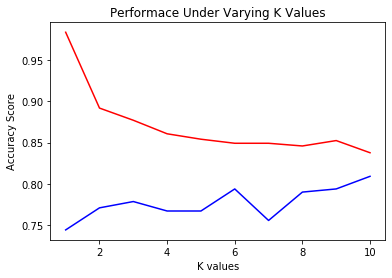

In [56]:
# Visual representation of KNN 

k_values=[1,2,3,4,5,6,7,8,9,10]
train_scores=[]
test_scores=[]
# instantiate the model 
k_nn=KNeighborsClassifier()

for k in k_values: 
  k_nn.n_neighbors=k 
  k_nn.fit(X_train,y_train)
  train_score=k_nn.score(X_train,y_train)
  test_score=k_nn.score(X_test,y_test)
  train_scores.append(train_score)
  test_scores.append(test_score)

plt.plot(k_values,train_scores, color='red',label='Training Accuracy');
plt.plot(k_values,test_scores, color='blue',label='Testing Accuracy');
plt.xlabel('K values')
plt.ylabel('Accuracy Score')
plt.title('Performace Under Varying K Values')

# Best value for neighbors would be 10 as it gives us a generalized model.

In [57]:
# Final implementation of KNN
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train,y_train)
knn_y_pred = neigh.predict(X_test)
knn_train_result = neigh.score(X_train, y_train)
knn_test_result = neigh.score(X_test, y_test)
print("KNN Training Accuracy: %.2f%%" % (knn_train_result*100.0))
print('*' * 100)
print("KNN Testing Accuracy: %.2f%%" % (knn_test_result*100.0))

KNN Training Accuracy: 83.77%
****************************************************************************************************
KNN Testing Accuracy: 80.92%


# Saving Models

In [48]:
# save the model to disk
filename1 = 'logistic_model.sav'
filename2 = 'randomforest_model.sav'
filename3 = 'knn_model.sav'
joblib.dump(logreg, filename1)
#joblib.dump(clf, filename2)

['logistic_model.sav']

In [ ]:
joblib.dump(clf, filename2)

In [49]:
joblib.dump(neigh, filename3)

['knn_model.sav']

# Algorithm Evaluation

In [22]:
# 1. Logistic Regression Confusion matrix

cm=confusion_matrix(y_test,y_pred)
col=["Predicted Dead","Predicted Survived"]
cm=pd.DataFrame(cm)
cm.columns=["Actual Dead","Actual Survived"]
cm.index=["Predicted Dead","Predicted Survived"]
cm

,Actual Dead,Actual Survived
Predicted Dead,129,27
Predicted Survived,25,81


In [23]:
# 2. Random Forest Confusion matrix
cm=confusion_matrix(y_test,clf_y_pred)
col=["Predicted Dead","Predicted Survived"]
cm=pd.DataFrame(cm)
cm.columns=["Actual Dead","Actual Survived"]
cm.index=["Predicted Dead","Predicted Survived"]
cm

,Actual Dead,Actual Survived
Predicted Dead,133,23
Predicted Survived,29,77


In [58]:
# 3. KNN Confusion matrix
cm=confusion_matrix(y_test,knn_y_pred)
col=["Predicted Dead","Predicted Survived"]
cm=pd.DataFrame(cm)
cm.columns=["Actual Dead","Actual Survived"]
cm.index=["Predicted Dead","Predicted Survived"]
cm

,Actual Dead,Actual Survived
Predicted Dead,142,14
Predicted Survived,36,70


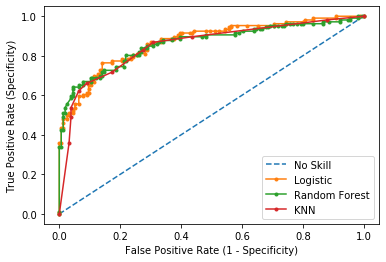

In [59]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
y_pred_proba = logreg.predict_proba(X_test) # because roc curve needs actual labels and predicted probabilities
clf_pred_proba = clf.predict_proba(X_test) # because roc curve needs actual labels and predicted probabilities
knn_pred_proba = neigh.predict_proba(X_test) # because roc curve needs actual labels and predicted probabilities

# keep probabilities for the positive outcome only
y_pred_proba = y_pred_proba[:, 1]
clf_pred_proba = clf_pred_proba[:, 1]
knn_pred_proba = knn_pred_proba[:, 1]

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred_proba)
rf_fpr, rf_tpr, _ = roc_curve(y_test, clf_pred_proba)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_pred_proba)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')
pyplot.plot(knn_fpr, knn_tpr, marker='.', label='KNN')

# axis labels
pyplot.xlabel('False Positive Rate (1 - Specificity)')
pyplot.ylabel('True Positive Rate (Specificity)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [61]:
# ROC-AUC Score

lr_auc = roc_auc_score(y_test, y_pred_proba)
rf_auc = roc_auc_score(y_test, clf_pred_proba)
knn_auc = roc_auc_score(y_test, knn_pred_proba)

# summarize scores

print('Logistic: ROC AUC=%.3f' % (lr_auc))
print('Random Forest : ROC AUC=%.3f' % (rf_auc))
print('KNN : ROC AUC=%.3f' % (knn_auc))

Logistic: ROC AUC=0.872
Random Forest : ROC AUC=0.863
KNN : ROC AUC=0.853


# So if we compare evaluation metrics Logistic Regression performs better than Random Forest and KNN on both training and testing set. So in this case study we would go with Logistic Regression as our final model

# Applying Logistic Regression on validation set

In [62]:
validation_data = pd.read_csv('test_data_algorithm.csv')

In [66]:
validation_data.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Sex_female,Embarked_C,Embarked_Q
0,34.5,0,0,7.8292,0,0,0,0,1
1,47.0,1,0,7.0000,0,0,1,0,0
2,62.0,0,0,9.6875,0,1,0,0,1
3,27.0,0,0,8.6625,0,0,0,0,0
4,22.0,1,1,12.2875,0,0,1,0,0


In [64]:
validation_data.drop('Unnamed: 0', axis = 1, inplace = True)

In [65]:
validation_data.columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2', 'Sex_female',
       'Embarked_C', 'Embarked_Q'],
      dtype='object')

In [67]:
validation_scaled = sc.transform(validation_data)

In [68]:
final_pred = logreg.predict(validation_scaled)

In [69]:
final_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,

In [73]:
# Saving final logistic Regression predictions on validation set.
FinalLogisticPredictions = pd.DataFrame({"Survived":final_pred})

FinalLogisticPredictions.Survived = FinalLogisticPredictions.Survived.astype(int)

FinalLogisticPredictions.to_csv("ValidationPredictions.csv")
print("Your submission was successfully saved!")

Your submission was successfully saved!
